In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [55.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz


In [4]:
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [7]:
import findspark
findspark.init()

In [8]:

from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Collision")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [9]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -y ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-05-07 15:28:35--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.203.96.188, 3.227.65.201, 52.204.138.61, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.203.96.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  18.5MB/s    in 0.7s    

2021-05-07 15:28:36 (18.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test

In [10]:
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
import pyspark
conf = pyspark.SparkConf()
conf.set("spark.driver.memory","8G");
import numpy as np
sc = SparkContext.getOrCreate(conf=conf)
from pyspark.sql.functions import round, col
from pyspark.sql.types import DateType
from pyspark.sql.functions import to_date
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
col=spark.read.option("header",True).csv("/content/drive/MyDrive/person_Cleaned.csv",inferSchema=True);

In [12]:
col.cache()
col.printSchema()

root
 |-- UNIQUE_ID: integer (nullable = true)
 |-- COLLISION_ID: integer (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- PERSON_ID: string (nullable = true)
 |-- PERSON_TYPE: string (nullable = true)
 |-- PERSON_INJURY: string (nullable = true)
 |-- VEHICLE_ID: integer (nullable = true)
 |-- PERSON_AGE: integer (nullable = true)
 |-- EJECTION: string (nullable = true)
 |-- EMOTIONAL_STATUS: string (nullable = true)
 |-- BODILY_INJURY: string (nullable = true)
 |-- POSITION_IN_VEHICLE: string (nullable = true)
 |-- SAFETY_EQUIPMENT: string (nullable = true)
 |-- PED_LOCATION: string (nullable = true)
 |-- PED_ACTION: string (nullable = true)
 |-- COMPLAINT: string (nullable = true)
 |-- PED_ROLE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)
 |-- PERSON_SEX: string (nullable = true)



In [13]:
col.createOrReplaceTempView("person");

In [14]:
age = spark.sql("select PERSON_AGE, count(PERSON_AGE) from person where PERSON_AGE not in (0,40) group by PERSON_AGE order by PERSON_AGE")   

In [15]:
#age = person.select("PERSON_AGE").distinct().show(150)

In [16]:
#age = age.show()

In [17]:
pip install pyspark_dist_explore

In [18]:
import pandas as pd

In [19]:
#pd.DataFrame(age.collect()).plot.bar(x=0,y=1,color=['orange'],figsize=(15,10))

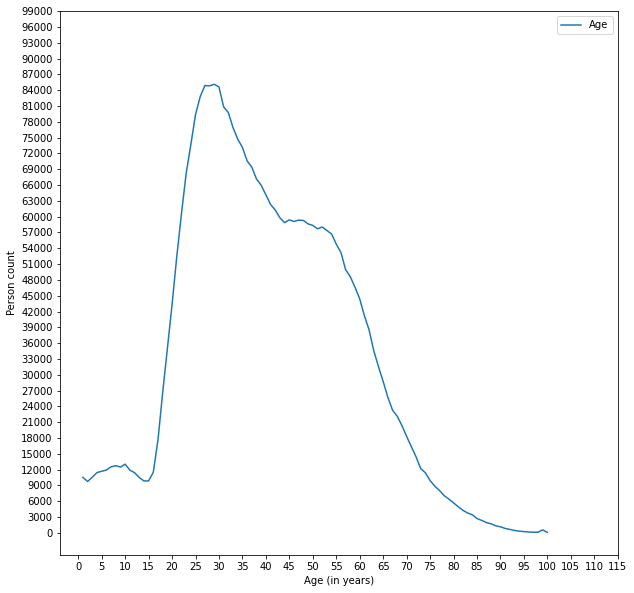

In [20]:
df = pd.DataFrame(age.collect())
plo=pd.DataFrame({
   'Age': df[1].tolist(),
   }, index=df[0].tolist())
plo.plot(figsize=(10,10),yticks=range(0, 100000, 3000),xticks=range(0,120,5),xlabel="Age (in years)",ylabel="Person count")

In [23]:
col.select('PERSON_INJURY').distinct().show(10)

+-------------+
|PERSON_INJURY|
+-------------+
|       Killed|
|  Unspecified|
|      Injured|
+-------------+



In [26]:
col.printSchema()


root
 |-- UNIQUE_ID: integer (nullable = true)
 |-- COLLISION_ID: integer (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- PERSON_ID: string (nullable = true)
 |-- PERSON_TYPE: string (nullable = true)
 |-- PERSON_INJURY: string (nullable = true)
 |-- VEHICLE_ID: integer (nullable = true)
 |-- PERSON_AGE: integer (nullable = true)
 |-- EJECTION: string (nullable = true)
 |-- EMOTIONAL_STATUS: string (nullable = true)
 |-- BODILY_INJURY: string (nullable = true)
 |-- POSITION_IN_VEHICLE: string (nullable = true)
 |-- SAFETY_EQUIPMENT: string (nullable = true)
 |-- PED_LOCATION: string (nullable = true)
 |-- PED_ACTION: string (nullable = true)
 |-- COMPLAINT: string (nullable = true)
 |-- PED_ROLE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)
 |-- PERSON_SEX: string (nullable = true)



In [27]:
col.select("BODILY_INJURY").distinct().show()

+--------------------+
|       BODILY_INJURY|
+--------------------+
|      Does Not Apply|
|                Head|
|         Unspecified|
|             Unknown|
|                Neck|
|Elbow-Lower-Arm-Hand|
|         Entire Body|
|                Face|
|                Back|
|       Hip-Upper Leg|
|    Abdomen - Pelvis|
|                 Eye|
|Shoulder - Upper Arm|
|               Chest|
| Knee-Lower Leg Foot|
+--------------------+



In [28]:
AvgpersonsInolved = spark.sql("select avg(counter) from (select COLLISION_ID, count(PERSON_INJURY) as counter from person group by COLLISION_ID)")

In [29]:
AvgpersonsInolved.show()

+-----------------+
|     avg(counter)|
+-----------------+
|3.723070623352955|
+-----------------+



In [30]:
EmotionalStats = spark.sql("select EMOTIONAL_STATUS, count(PERSON_ID) as counter from person group by EMOTIONAL_STATUS having EMOTIONAL_STATUS not in ('Unspecified','Unknown','Does Not Apply','Conscious') order by counter desc")

In [31]:
EmotionalStats.show()

+----------------+-------+
|EMOTIONAL_STATUS|counter|
+----------------+-------+
|           Shock|   6984|
|   Semiconscious|   1827|
|     Unconscious|   1533|
|      Incoherent|   1263|
|  Apparent Death|   1107|
+----------------+-------+



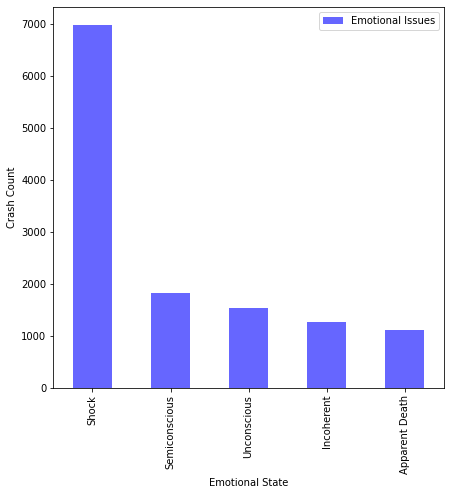

In [32]:
pd.DataFrame(EmotionalStats.collect()).plot.bar(x=0,y=1,color=["#6666ff","#6666ff","#6666ff","#6666ff","#6666ff"],figsize=(7,7)
                                                                                                          ,xlabel="Emotional State",ylabel="Crash Count",label="Emotional Issues")


In [34]:
InjuryTypeAndShockCount = spark.sql("select BODILY_INJURY, count(EMOTIONAL_STATUS) as counter from person where EMOTIONAL_STATUS not in ('Unspecified','Unknown','Does Not Apply','Conscious') group by BODILY_INJURY having BODILY_INJURY not in ('Does Not Apply','Unknown','Does Not Apply','Unspecified') order by counter desc")


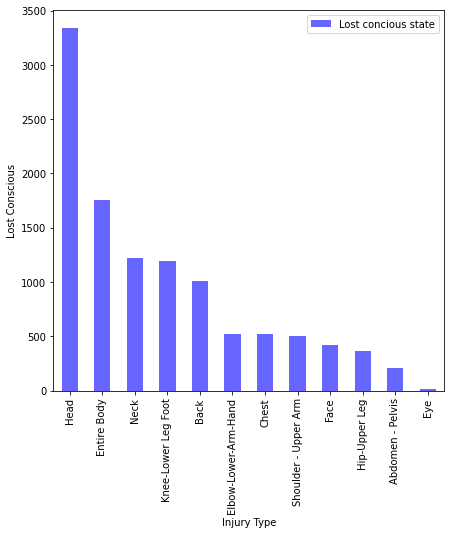

In [35]:
pd.DataFrame(InjuryTypeAndShockCount.collect()).plot.bar(x=0,y=1,color=["#6666ff","#6666ff","#6666ff","#6666ff","#6666ff"],figsize=(7,7)
                                                                                                          ,xlabel="Injury Type",ylabel="Lost Conscious",label="Lost concious state")


In [36]:
DeadliestBodlyInjuries = spark.sql("select BODILY_INJURY, count(PERSON_INJURY) as total from person where PERSON_INJURY='Killed' group by BODILY_INJURY having BODILY_INJURY not in ('Does Not Apply','Unknown','Does Not Apply','Unspecified') order by total desc")


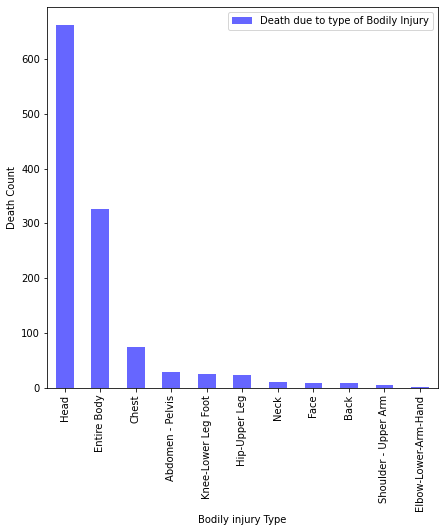

In [37]:
pd.DataFrame(DeadliestBodlyInjuries.collect()).plot.bar(x=0,y=1,color=["#6666ff","#6666ff","#6666ff","#6666ff","#6666ff"],figsize=(7,7)
                                                                                                          ,xlabel="Bodily injury Type",ylabel="Death Count",label="Death due to type of Bodily Injury")
